In [7]:

import numpy as np
import pandas as pd
import scipy.optimize
import scipy.stats as st
import numba

import corner
import bebi103

import matplotlib.pyplot as plt
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14}
sns.set(rc=rc)
%matplotlib inline

In [3]:
df = pd.read_csv('../data/finch_beaks.csv', comment='#')

In [4]:

# Filter to get scandens
inds = df['species'] == 'scandens' 
allScandens = df.loc[inds,: ]
allScandens.head()

,band,species,beak length (mm),beak depth (mm),year
73,20121,scandens,15.15,9.35,1973
74,20125,scandens,15.05,9.75,1973
75,20135,scandens,14.45,8.35,1973
76,20159,scandens,14.05,9.55,1973
77,20160,scandens,14.25,8.55,1973


In [5]:
# Get all scandens in 1975
inds1975 = allScandens['year'] == 1975
scandens1975 = allScandens.loc[inds1975, :]
scandens1975.head()

,band,species,beak length (mm),beak depth (mm),year
405,302,scandens,13.9,8.4,1975
406,304,scandens,14.0,8.8,1975
407,306,scandens,12.9,8.4,1975
408,310,scandens,13.5,8.0,1975
409,317,scandens,12.9,7.9,1975


In [6]:

# Get all scandens in 2012
inds2012 = allScandens['year'] == 2012
scandens2012 = allScandens.loc[inds2012, :]
scandens2012.head()

,band,species,beak length (mm),beak depth (mm),year
2177,19026,scandens,14.3,9.4,2012
2178,19028,scandens,12.5,8.9,2012
2179,19029,scandens,13.7,9.5,2012
2180,19094,scandens,13.8,11.0,2012
2181,19122,scandens,12.0,8.7,2012


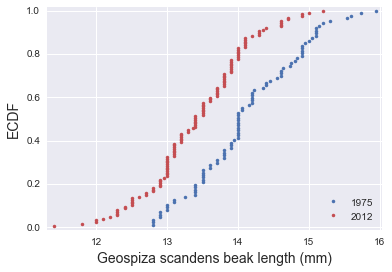

In [8]:

# Store data as Numpy arrays for speed later
s1975 = scandens1975['beak length (mm)'].values
s2012 = scandens2012['beak length (mm)'].values

# Get x-y values for ECDF
x_control, y_control = bebi103.ecdf(s1975)
x_pest, y_pest = bebi103.ecdf(s2012)

# Make plots
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_pest, y_pest, marker='.', linestyle='none', 
         color=sns.color_palette()[2])
plt.margins(0.02)
plt.xlabel('Geospiza scandens beak length (mm)')
plt.ylabel('ECDF')
plt.legend(('1975', '2012'), loc='lower right');

In [9]:
# Filter to get scandens
inds = df['species'] == 'scandens' 
allScandens = df.loc[inds, :]

# Get all scandens in 1975
inds1975 = allScandens['year'] == 1975
scandens1975 = allScandens.loc[inds1975, :]

# Get all scandens in 2012
inds2012 = allScandens['year'] == 2012
scandens2012 = allScandens.loc[inds2012, :]

# Get the beak depths into numpy arrays
depth1975 = np.array(scandens1975['beak depth (mm)'])
depth2012 = np.array(scandens2012['beak depth (mm)'])

In [10]:

@numba.jit(nopython=True)
def draw_perm_sample(x, y):
    '''Generate a permutation sample.'''
    concat_data = np.concatenate((x, y))
    np.random.shuffle(concat_data)
    return concat_data[:len(x)], concat_data[len(x):]

@numba.jit(nopython=True)
def draw_perm_reps_diff_mean(x, y, size=10000):
    '''
    Generate array of permuation replicates.
    '''
    out = np.empty(size)
    for i in range(size):
        x_perm, y_perm = draw_perm_sample(x, y)
        out[i] = abs(np.mean(x_perm) - np.mean(y_perm))
    return out

# Compute test statistic for original data set
diff_mean = abs(np.mean(depth1975) - np.mean(depth2012))

# Draw replicates
perm_reps = draw_perm_reps_diff_mean(depth1975, depth2012, size=100000)

# Compute p-value
p_val = np.sum(perm_reps >= diff_mean) / len(perm_reps)

print('p-value =', p_val)

UntypedAttributeError: Failed at nopython (nopython frontend)
Failed at nopython (nopython frontend)
Unknown attribute "concatenate" of type Module(<module 'numpy' from 'C:\\Users\\andre_000\\Anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
File "<ipython-input-10-1f7ed74d0354>", line 5